### iot data
> Sensor data from Arduino with CdS and DHT22

- temperature
- humidity
- luminosity

In [0]:
# Access a data file in csv format from the remote express server with CORS.
iot=pd.read_csv('aa01_all.csv', index_col='date')

In [132]:
iot.shape

(3186, 3)

In [133]:
iot.head()

,temperature,humidity,luminosity
date,,,
2019-12-04 14:35:48.744,22.5,31.1,277
2019-12-04 14:35:51.021,22.5,30.8,282
2019-12-04 14:35:53.294,22.5,30.6,284
2019-12-04 14:35:55.572,22.5,30.3,242
2019-12-04 14:35:57.845,22.5,30.1,267


In [134]:
iot.tail()

,temperature,humidity,luminosity
date,,,
2019-12-04 16:36:28.344,22.0,23.9,101
2019-12-04 16:36:30.618,22.0,23.9,100
2019-12-04 16:36:32.895,22.0,23.9,101
2019-12-04 16:36:35.173,22.0,23.9,100
2019-12-04 16:36:37.446,22.0,23.9,100


In [135]:
iot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3186 entries, 2019-12-04 14:35:48.744 to 2019-12-04 16:36:37.446
Data columns (total 3 columns):
temperature    3186 non-null float64
humidity       3186 non-null float64
luminosity     3186 non-null int64
dtypes: float64(2), int64(1)
memory usage: 99.6+ KB


In [136]:
iot.describe()

,temperature,humidity,luminosity
count,3186.000000,3186.000000,3186.000000
mean,22.519209,26.769397,146.945386
std,0.261600,1.871004,74.377079
min,22.000000,23.400000,79.000000
25%,22.300000,24.825000,107.000000
50%,22.600000,27.200000,113.000000
75%,22.700000,28.400000,119.000000
max,23.000000,31.100000,328.000000


#### Sort index by date

In [0]:
iot_s = iot.sort_index()

In [138]:
iot_s.head()

,temperature,humidity,luminosity
date,,,
2019-12-04 14:35:48.744,22.5,31.1,277
2019-12-04 14:35:51.021,22.5,30.8,282
2019-12-04 14:35:53.294,22.5,30.6,284
2019-12-04 14:35:55.572,22.5,30.3,242
2019-12-04 14:35:57.845,22.5,30.1,267


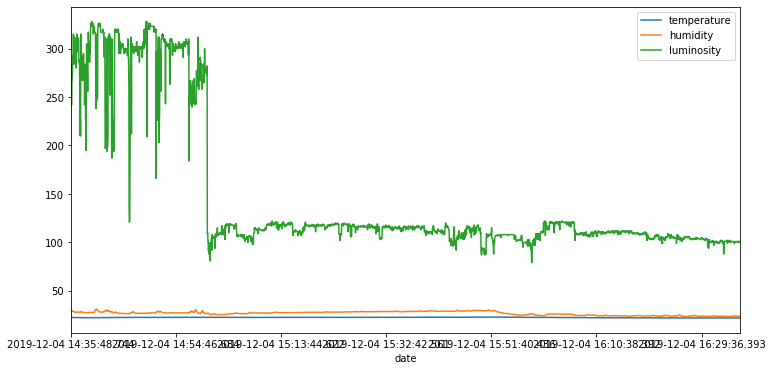

In [139]:
iot_s.plot(figsize=(12,6)) #, rot=90)

In [140]:
# 평균
iot_s.mean()

temperature     22.519209
humidity        26.769397
luminosity     146.945386
dtype: float64

In [141]:
# 표준편차
iot_s.std()

temperature     0.261600
humidity        1.871004
luminosity     74.377079
dtype: float64

#### 평균과 표준편차를 이용한 그래프

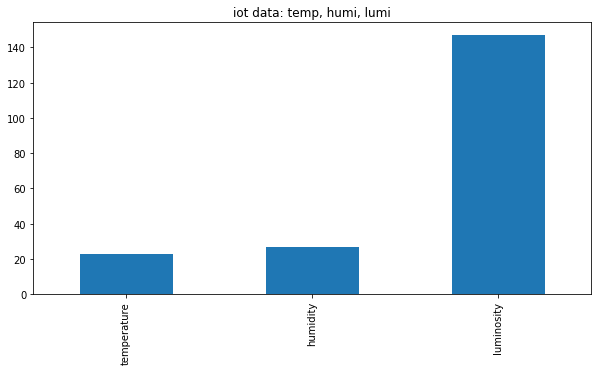

In [142]:
iot_s.mean().plot.bar(figsize=(10,5), title="iot data: temp, humi, lumi")

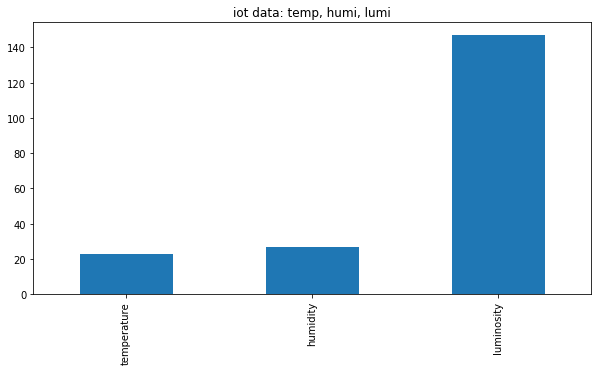

In [143]:
iot_s.mean().plot.bar(figsize=(10,5), title="iot data: temp, humi, lumi") #, yerr=iot_s.std(), rot=0)

### 시간 간격에 따른 센서 데이터의 변화 그래프

## Plot the change of sensor data over various time spans.

- resample the data at different frequency
- time span: 60 sec, 1 hour, 1 day, 1 week

In [144]:
iot_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3186 entries, 2019-12-04 14:35:48.744 to 2019-12-04 16:36:37.446
Data columns (total 3 columns):
temperature    3186 non-null float64
humidity       3186 non-null float64
luminosity     3186 non-null int64
dtypes: float64(2), int64(1)
memory usage: 99.6+ KB


In [145]:
# type of index
iot_s.index[0], type(iot_s.index[0])

('2019-12-04 14:35:48.744', str)

In [0]:
# Convert index to timestamp
iot_s.index = pd.to_datetime(iot_s.index)

In [147]:
iot_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3186 entries, 2019-12-04 14:35:48.744000 to 2019-12-04 16:36:37.446000
Data columns (total 3 columns):
temperature    3186 non-null float64
humidity       3186 non-null float64
luminosity     3186 non-null int64
dtypes: float64(2), int64(1)
memory usage: 99.6 KB


> 인덱스가 문자열에서 Datatime 인덱스로 전환되었다.

> 시간 지정 및 계산 효과를 그래프에 반영한다.

In [148]:
# Estimate the mean of iot_s for every 10 minutes
iot_s.resample('600S').mean()  # mean per each 10 minutes

,temperature,humidity,luminosity
date,,,
2019-12-04 14:30:00,22.369369,28.031532,289.126126
2019-12-04 14:40:00,22.503409,27.642045,292.090909
2019-12-04 14:50:00,22.688973,27.627376,290.068441
2019-12-04 15:00:00,22.626136,26.374621,116.090909
2019-12-04 15:10:00,22.544867,27.525856,116.091255
2019-12-04 15:20:00,22.617045,28.200000,116.579545
2019-12-04 15:30:00,22.725758,28.687879,114.594697
2019-12-04 15:40:00,22.816350,29.216350,109.714829
2019-12-04 15:50:00,22.818939,26.920455,103.231061


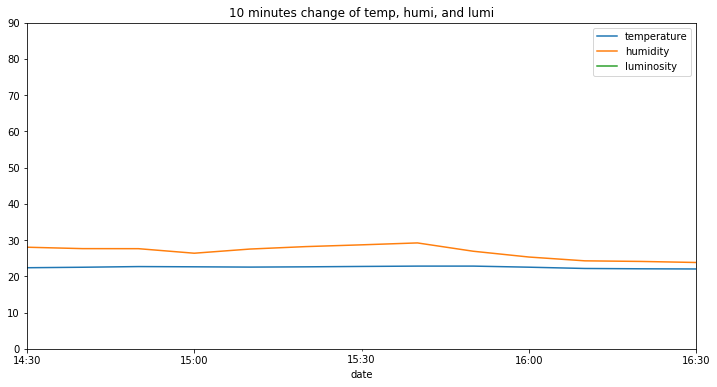

In [149]:
#  Plot mean of the iot data per every 10 minutes 
iot_s.resample('600S').mean().plot(figsize=(12,6), title='10 minutes change of temp, humi, and lumi', 
                                ylim=[0,90])

In [150]:
# Estimate the mean of iot_s for every hour
iot_s.resample('H').mean()  # mean per each hour

,temperature,humidity,luminosity
date,,,
2019-12-04 14:00:00,22.556583,27.703762,290.741379
2019-12-04 15:00:00,22.691530,27.820164,112.716814
2019-12-04 16:00:00,22.212319,24.431470,108.030021


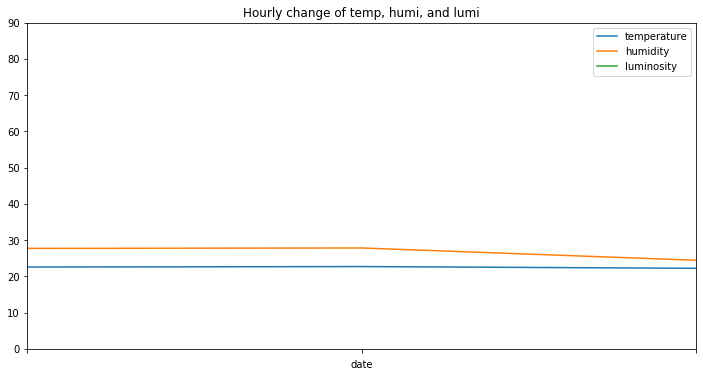

In [151]:
#  Plot mean of the iot data per every hour 
iot_s.resample('H').mean().plot(figsize=(12,6), title='Hourly change of temp, humi, and lumi', 
                                ylim=[0,90])

In [152]:
# Estimate the mean of iot_s for every day
iot_s.resample('D').mean()  # mean per each day

,temperature,humidity,luminosity
date,,,
2019-12-04,22.519209,26.769397,146.945386


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 18234.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


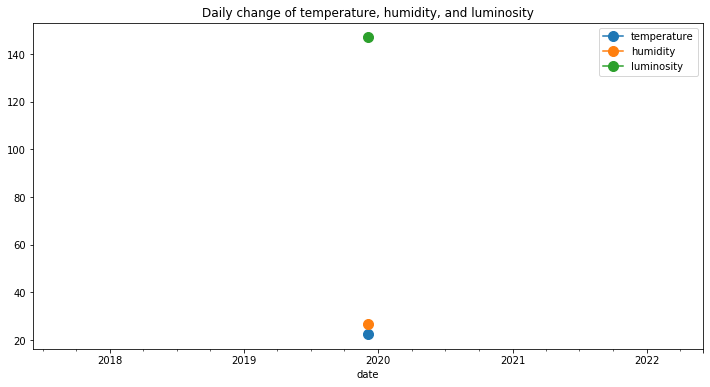

In [153]:
#  Plot mean of the iot data per every day
iot_s.resample('D').mean().plot(kind='line', marker='o', ms=10, figsize=(12,6), title='Daily change of temperature, humidity, and luminosity')

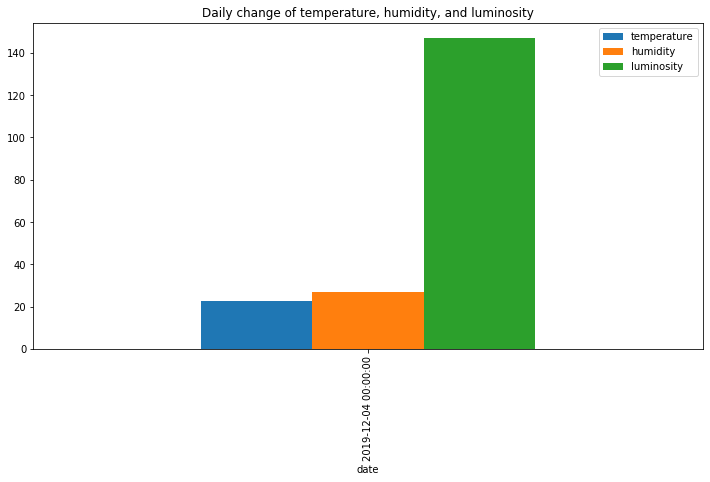

In [154]:
#  Plot bar graph using mean of the iot data per every day
iot_s.resample('D').mean().plot(kind='bar', figsize=(12, 6), title='Daily change of temperature, humidity, and luminosity')

#### DIY
1. 주별 평균값을 계산하시오.
2. 주별 평균값을 시각화 하시오.





---



In [155]:
iot_s.resample('W').mean()

,temperature,humidity,luminosity
date,,,
2019-12-08,22.519209,26.769397,146.945386


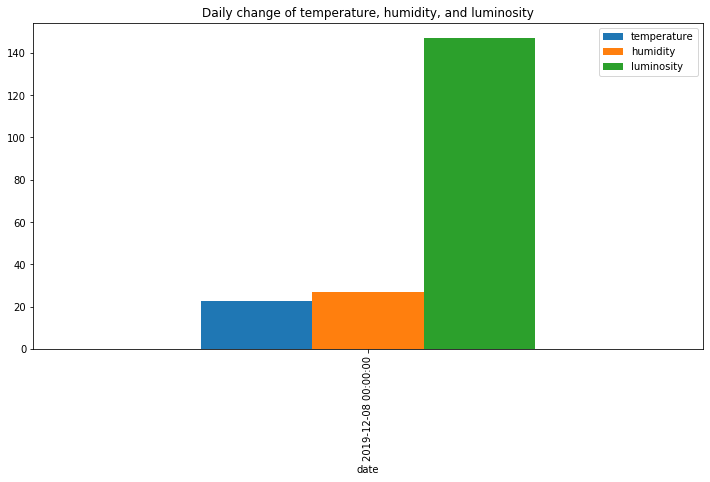

In [156]:
iot_s.resample('W').mean().plot(kind='bar', figsize=(12, 6), title='Daily change of temperature, humidity, and luminosity')